In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/titanic/train.csv')

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# dealing missing value
df.Age.fillna(df.Age.mean(), inplace=True)
df.Cabin.fillna('N', inplace=True)
df.Embarked.fillna('N', inplace=True)

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df['Cabin'] = df.Cabin.str[:1]

In [14]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

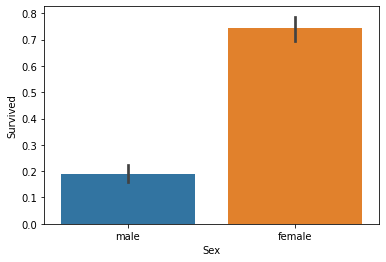

In [15]:
sns.barplot(x='Sex', y='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

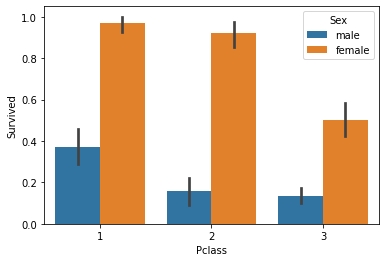

In [16]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

In [17]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'        
    else: cat = 'Elderly'
    
    return cat

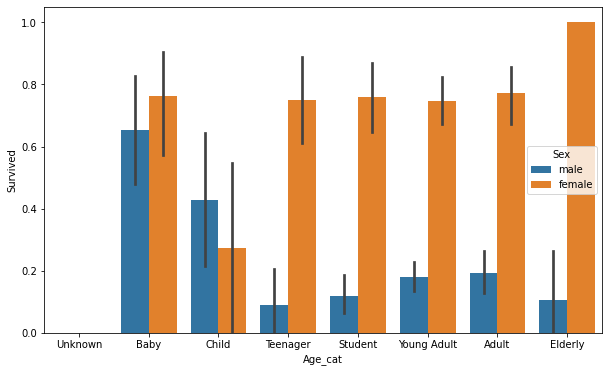

In [19]:
plt.figure(figsize=(10, 6))
g_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
df['Age_cat'] = df.Age.apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df, order=g_names)
df.drop('Age_cat', axis=1, inplace=True)

# Module

In [20]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    # dealing missing value
    df.Age.fillna(df.Age.mean(), inplace=True)
    df.Cabin.fillna('N', inplace=True)
    df.Embarked.fillna('N', inplace=True)
    df.Fare.fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for f in features:
        le = LabelEncoder()
        le = le.fit(df[f])
        df[f] = le.transform(df[f])
    return df

def transform(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [21]:
tt_df = pd.read_csv('../data/titanic/train.csv')

In [22]:
x_df = tt_df.drop('Survived', axis=1)
y_df = tt_df.Survived
x_df = transform(x_df)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=11)

## model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)

print('Decision Tree Accuracy: ', accuracy_score(y_test, dt_pred))
print('Random Forest Accuracy: ', accuracy_score(y_test, rf_pred))
print('Logistic Regression Accuracy: ', accuracy_score(y_test, lr_pred))

Decision Tree Accuracy:  0.8100558659217877
Random Forest Accuracy:  0.8491620111731844
Logistic Regression Accuracy:  0.8491620111731844


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
scores = cross_val_score(dt, x_df, y_df, cv=5)
print(scores)
print('Average: ', np.mean(scores))

[0.74301676 0.76966292 0.80337079 0.78651685 0.83146067]
Average:  0.7868055991463185


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {
    'max_depth': [2,3,5,10], 
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1,5,8]
         }

g_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5)
g_cv.fit(X_train, y_train)

print('Best params: ', g_cv.best_params_)
print('Best accuracy: ', g_cv.best_score_)

Best params:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best accuracy:  0.7991825076332119


In [33]:
estimator = g_cv.best_estimator_
pred = estimator.predict(X_test)
accuracy_score(y_test, pred)

0.8715083798882681